<a href="https://colab.research.google.com/github/Hachiman999/Colab-imagen/blob/master/practica_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
from google.colab.patches import cv2_imshow
from google.colab import drive 

drive.mount('/content/drive')

#importar librerias
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
#path
path_dir='/content/drive/My Drive/Colab/Imagen'
os.chdir(path_dir)

#graficar imagenes 
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def mostrar2(a,b, titulo1 ="original", titulo2="original"):
   plt.figure(figsize=(20,20))
   plt.subplot(221), plt.imshow(a), plt.title(titulo1)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(222), plt.imshow(b), plt.title(titulo2)
   plt.xticks([])
   plt.yticks([])
   plt.show()

In [0]:
def mostrar3_gris(a,b,c, titulo1 ="original", titulo2="original",titulo3="original"):
   plt.figure(figsize=(20,20))
   plt.subplot(231), plt.imshow(a,cmap='gray'), plt.title(titulo1)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(232), plt.imshow(b,cmap='gray'), plt.title(titulo2)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(233), plt.imshow(c,cmap='gray'), plt.title(titulo3)
   plt.xticks([])
   plt.yticks([])
   plt.show()

In [0]:
def mostrar4(a,b,c,d):
    histograma1 = cv2.calcHist([a],[0],None,[256],[0,256])
    histograma2 = cv2.calcHist([b],[0],None,[256],[0,256])
    histograma3 = cv2.calcHist([c],[0],None,[256],[0,256])
    histograma4 = cv2.calcHist([d],[0],None,[256],[0,256])
    #--------
    plt.figure(figsize=(14,20))
    #-----------
    plt.subplot(421), plt.imshow(a, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(422), plt.plot(histograma1 , color='gray')
    plt.xlabel('intensidad de iluminacion')
    plt.ylabel('cantidad de pixeles')
    #------------
    plt.subplot(423), plt.imshow(b, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(424), plt.plot(histograma2 , color='gray')
    plt.xlabel('intensidad de iluminacion')
    plt.ylabel('cantidad de pixeles')
    #----------
    plt.subplot(425), plt.imshow(c, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(426), plt.plot(histograma3 , color='gray')
    plt.xlabel('intensidad de iluminacion')
    plt.ylabel('cantidad de pixeles')
    #---------
    plt.subplot(427), plt.imshow(d, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(428), plt.plot(histograma4, color='gray')
    plt.xlabel('intensidad de iluminacion')
    plt.ylabel('cantidad de pixeles')
    plt.show()
    

In [0]:
def gama(a):
    r = np.array(255*(a/255) **0.2, dtype= 'uint8')
    #r = np.array(r, dtype = np.uint8)
    return r
def ngama(a):
    r = np.array(255*(a/255) **2.2, dtype= 'uint8')
    #r = np.array(r, dtype = np.uint8)
    return r

In [0]:
def ecual(img):
    imgx = cv2.equalizeHist(img)
    return imgx

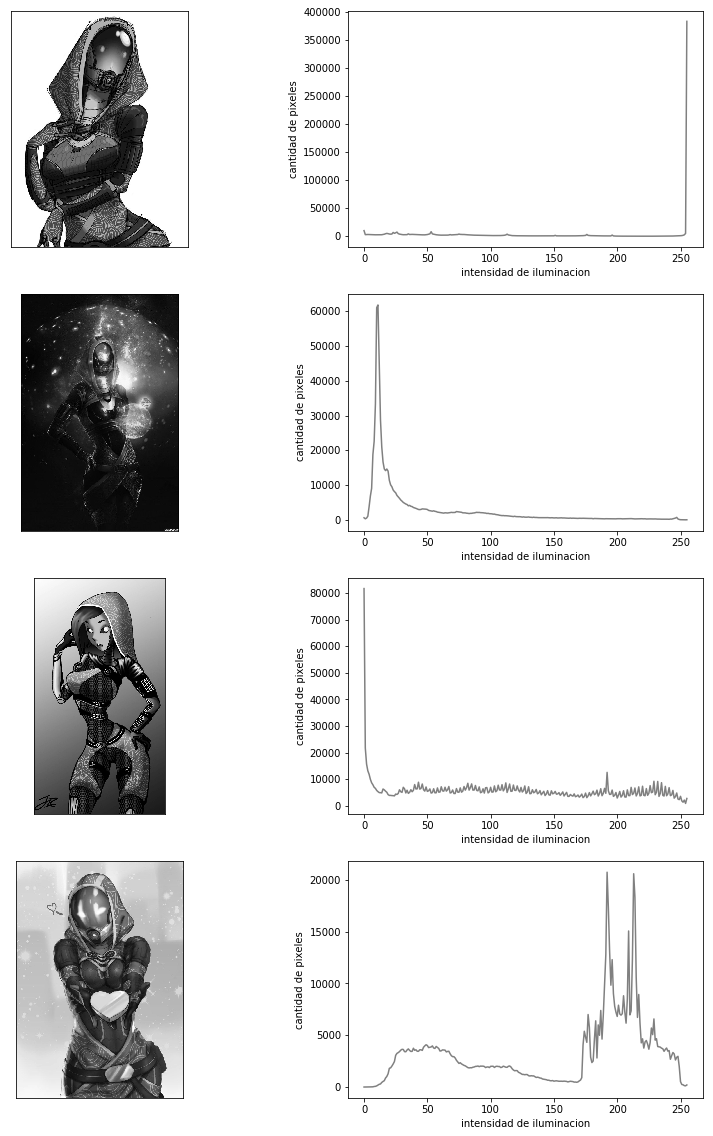

In [0]:
a = cv2.imread('tali.jpg', cv2.IMREAD_GRAYSCALE)
b= cv2.imread('tali2.jpg', cv2.IMREAD_GRAYSCALE)
c= cv2.imread('tali3.jpg', cv2.IMREAD_GRAYSCALE)
d = cv2.imread('tali4.jpg', cv2.IMREAD_GRAYSCALE)



mostrar4(a,b,c,d)





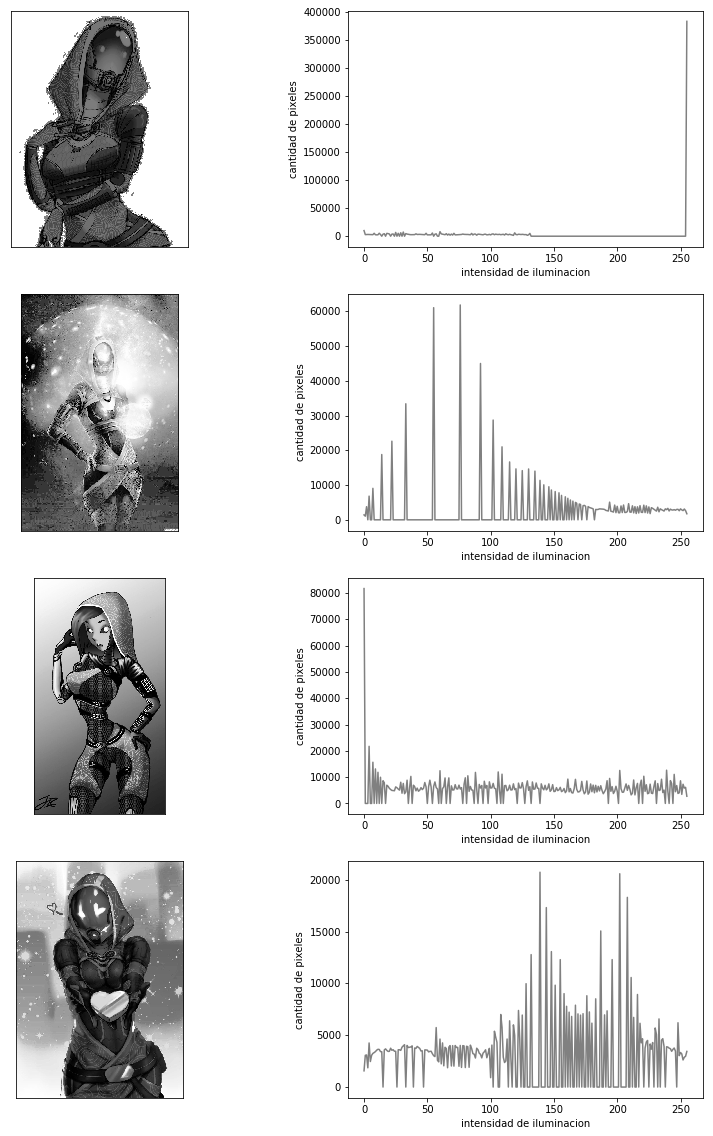

In [0]:
mostrar4(ecual(a),ecual(b),ecual(c),ecual(d))


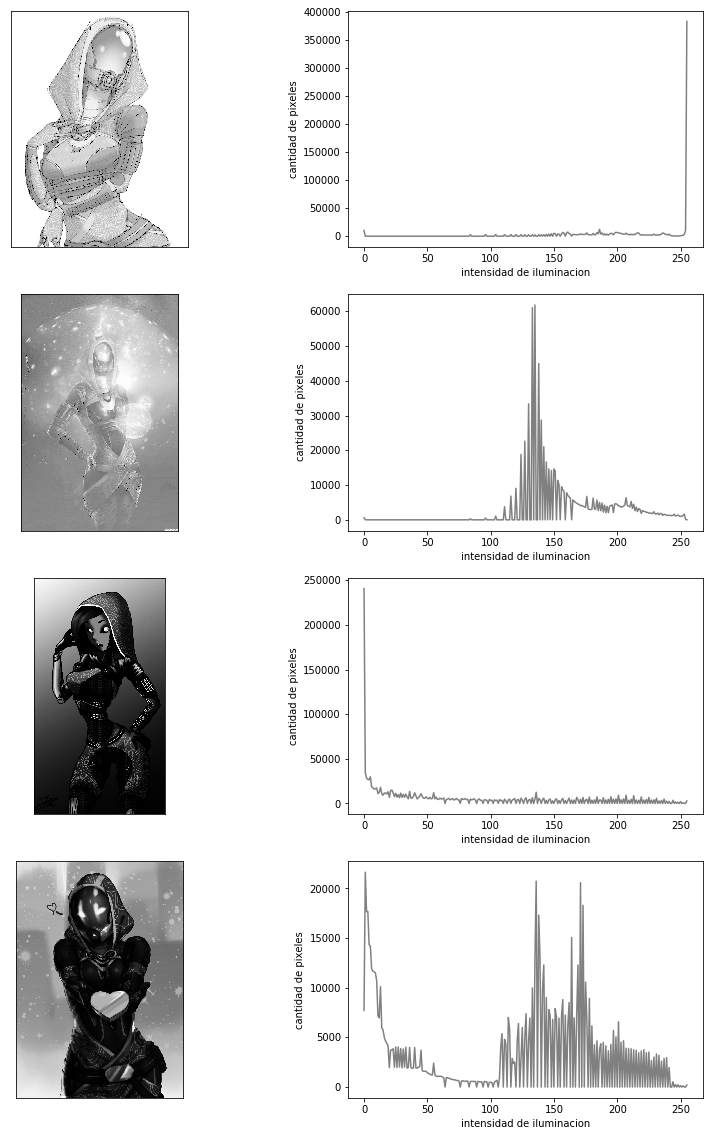

In [0]:
mostrar4(gama(a),gama(b),ngama(c),ngama(d))


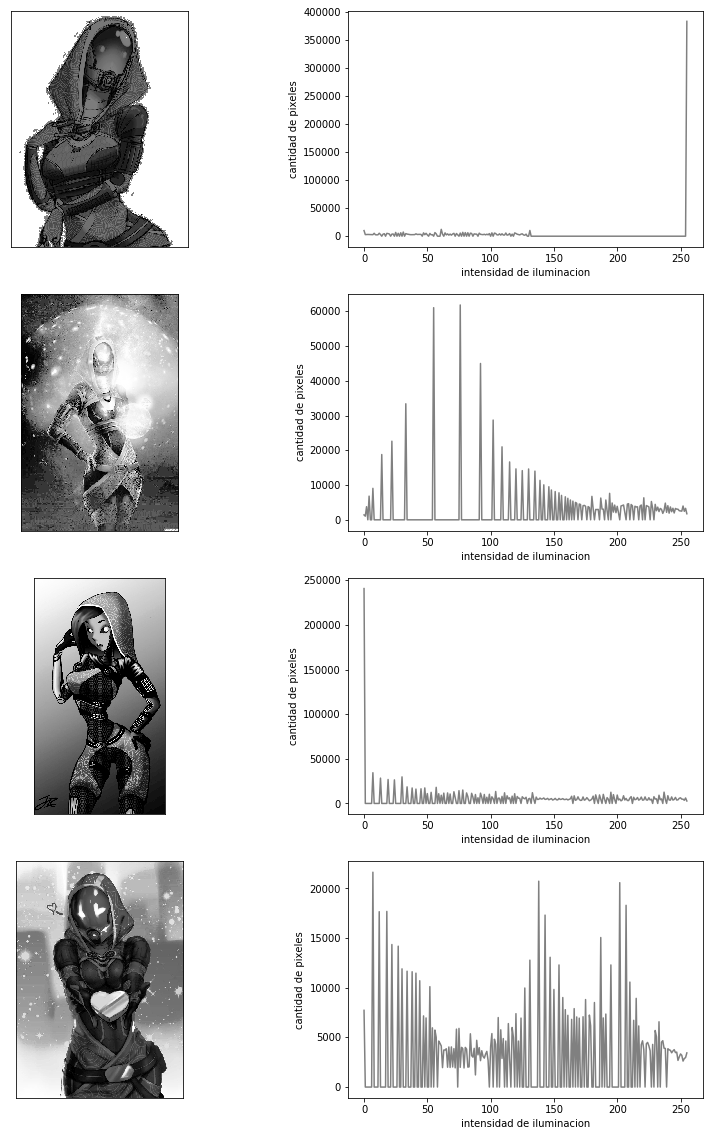

In [0]:
mostrar4(ecual(gama(a)),ecual(gama(b)),ecual(ngama(c)),ecual(ngama(d)))

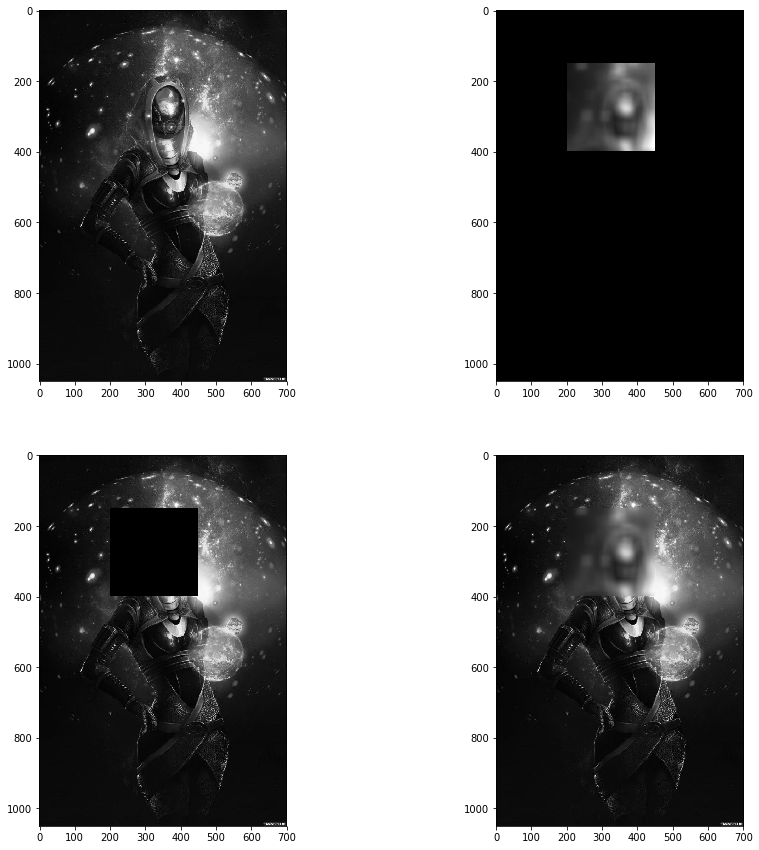

In [215]:
img = cv2.imread('tali2.jpg',0)
img2 =cv2.blur(img,(30,30))
mask = np.zeros(img.shape[:2],np.uint8)
mask[:, :] = 255
mask[150:400, 200:450] = 0
massked = cv2.bitwise_and(img , img, mask= mask)

mask2 = np.zeros(img2.shape[:2],np.uint8)

mask2[150:400, 200:450] = 255
massked2 = cv2.bitwise_and(img2 , img2, mask= mask2)
defi = massked+massked2



his = cv2.calcHist([img],[0],None,[256],[0,256])
his2 = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.imshow(massked2,'gray')
plt.subplot(223), plt.imshow(massked,'gray')
plt.subplot(224), plt.imshow(defi,'gray')
plt.show()


filtros espaciales 

kerlnel recoore cda uno de los valores de la imagens (multiplica y suman)
padin 0 agregan 0 a los bordes


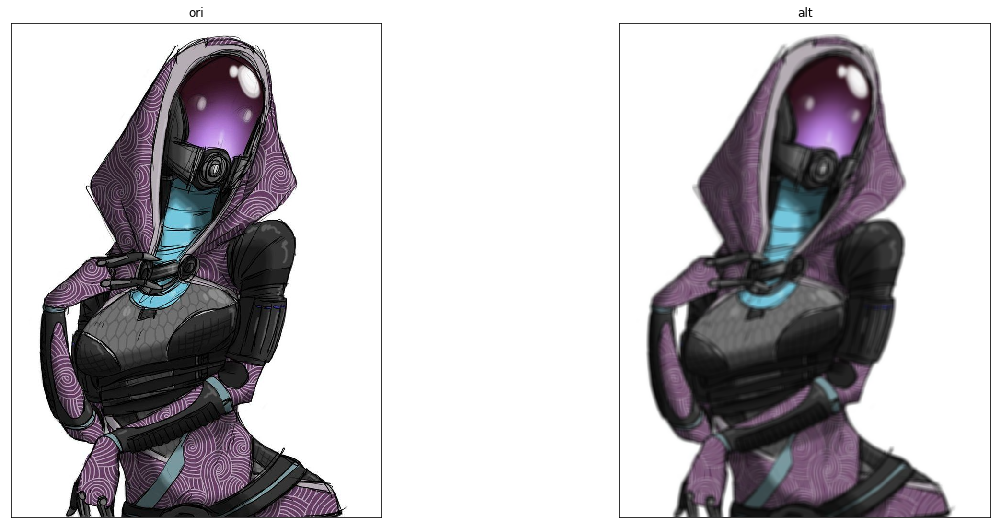

In [125]:
img = cv2.imread('tali.jpg')

kernel = np.ones((9,9), np.float32)/81
dst = cv2.filter2D(img , -1,kernel)

mostrar2(img, dst,'ori','alt')

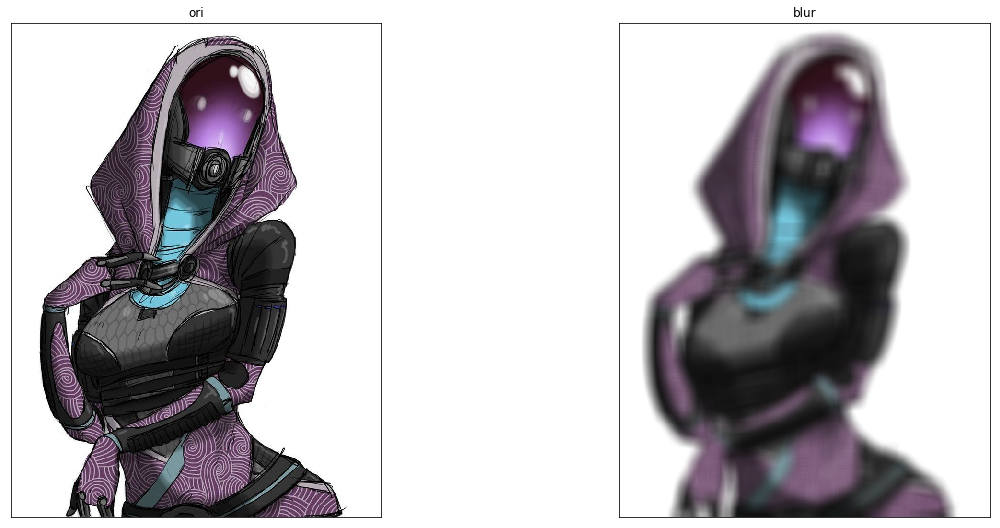

In [127]:
img = cv2.imread('tali.jpg')
blur = cv2.blur(img,(30,30))
mostrar2(img , blur,"ori","blur")

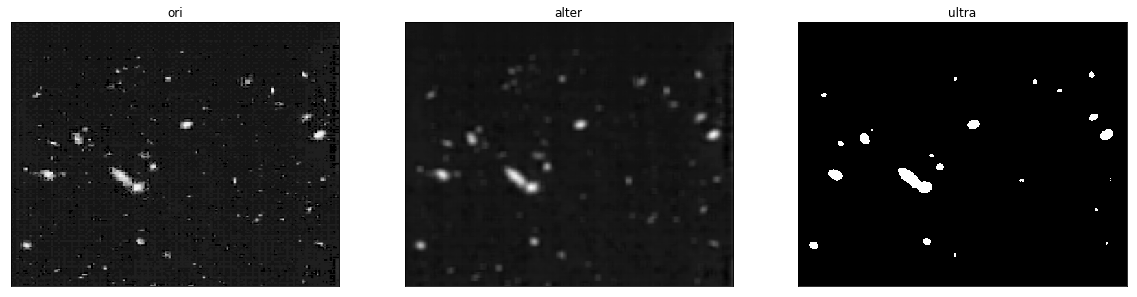

In [204]:

img = cv2.imread('manchas.PNG', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((9,9), np.float32)/81
dst = cv2.filter2D(img , -1,kernel)

kernel2 = np.ones((9,9), np.float32)/9**4.3
dst2 = cv2.filter2D(img , -1,kernel2)


mostrar3_gris(img , dst,dst2, "ori","alter","ultra")